# Reading the signals etc

In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.integrate import simps
from scipy.fft import fftshift
from tsfel.feature_extraction import features as tsfelf
import gpxpy 
import gpxpy.gpx 

In [2]:
from os import listdir
from os.path import isfile, join


In [3]:
def bpf(arr, fs, lf, hf, order):
    wbut = [lf, hf]
    bbut, abut = signal.butter(order, wbut, btype ='bandpass', fs = fs)

    return signal.filtfilt(bbut, abut, arr)

def hpf(arr, fs, lf, order):
    wbut = lf
    bbut, abut = signal.butter(order, wbut, btype ='highpass', fs =fs)

    return signal.filtfilt(bbut, abut, arr)


In [4]:
df = pd.read_csv('C:\\Users\\Owner\\Downloads\\CapstoneData\\13_Jan_2022_speed\\track_points.csv')

df

,X,Y,track_fid,track_seg_id,track_seg_point_id,ele,time,course,speed,magvar,...,urlname,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid
0,22.291483,60.455623,0,0,0,31.878,2022/01/13 12:40:05+00,NaN,5.44,NaN,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
1,22.291559,60.455589,0,0,1,30.275,2022/01/13 12:40:06+00,NaN,5.99,NaN,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
2,22.291658,60.455541,0,0,2,29.579,2022/01/13 12:40:07+00,NaN,7.80,NaN,...,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN,NaN
3,22.291740,60.455453,0,0,3,30.922,2022/01/13 12:40:08+00,NaN,10.56,NaN,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
4,22.291758,60.455289,0,0,4,32.841,2022/01/13 12:40:09+00,NaN,12.02,NaN,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,22.434055,60.426277,0,0,390,50.065,2022/01/13 12:46:48+00,NaN,27.13,NaN,...,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN
391,22.434486,60.426388,0,0,391,51.075,2022/01/13 12:46:49+00,NaN,26.93,NaN,...,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN
392,22.434925,60.426489,0,0,392,49.550,2022/01/13 12:46:50+00,NaN,26.45,NaN,...,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN
393,22.435358,60.426595,0,0,393,50.104,2022/01/13 12:46:51+00,NaN,26.10,NaN,...,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN


In [5]:
timestamp = df['time']

timestamp

0      2022/01/13 12:40:05+00
1      2022/01/13 12:40:06+00
2      2022/01/13 12:40:07+00
3      2022/01/13 12:40:08+00
4      2022/01/13 12:40:09+00
                ...          
390    2022/01/13 12:46:48+00
391    2022/01/13 12:46:49+00
392    2022/01/13 12:46:50+00
393    2022/01/13 12:46:51+00
394    2022/01/13 12:46:52+00
Name: time, Length: 395, dtype: object

In [6]:
df['time'][0]

'2022/01/13 12:40:05+00'

In [7]:
start = int('14_40_05')
end = int('14_46_48')

start

144005

In [8]:
mypath = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\13.01.2022'
onlyfiles3 = [f for f in listdir(mypath) if isfile(join(mypath, f))]

onlyfiles3

['2022_14_37_37-Jan-13.wav',
 '2022_14_37_47-Jan-13.wav',
 '2022_14_37_57-Jan-13.wav',
 '2022_14_38_07-Jan-13.wav',
 '2022_14_38_17-Jan-13.wav',
 '2022_14_38_28-Jan-13.wav',
 '2022_14_38_38-Jan-13.wav',
 '2022_14_38_48-Jan-13.wav',
 '2022_14_38_58-Jan-13.wav',
 '2022_14_39_08-Jan-13.wav',
 '2022_14_39_19-Jan-13.wav',
 '2022_14_39_29-Jan-13.wav',
 '2022_14_39_39-Jan-13.wav',
 '2022_14_39_49-Jan-13.wav',
 '2022_14_39_59-Jan-13.wav',
 '2022_14_40_10-Jan-13.wav',
 '2022_14_40_20-Jan-13.wav',
 '2022_14_40_30-Jan-13.wav',
 '2022_14_40_40-Jan-13.wav',
 '2022_14_40_50-Jan-13.wav',
 '2022_14_41_00-Jan-13.wav',
 '2022_14_41_11-Jan-13.wav',
 '2022_14_41_21-Jan-13.wav',
 '2022_14_41_31-Jan-13.wav',
 '2022_14_41_41-Jan-13.wav',
 '2022_14_41_51-Jan-13.wav',
 '2022_14_42_02-Jan-13.wav',
 '2022_14_42_12-Jan-13.wav',
 '2022_14_42_22-Jan-13.wav',
 '2022_14_42_32-Jan-13.wav',
 '2022_14_42_42-Jan-13.wav',
 '2022_14_42_53-Jan-13.wav',
 '2022_14_43_03-Jan-13.wav',
 '2022_14_43_13-Jan-13.wav',
 '2022_14_43_2

In [45]:
all_freqs = []

for i in range(len(onlyfiles3)):
    sig = read_data3(onlyfiles3[i])
    mf = tsfelf.max_frequency(sig, 44100)
    all_freqs.append(mf)
    
all_freqs

[3084.595112601821,
 3754.743651173934,
 3999.6597987541927,
 5120.900814566363,
 4103.3013895543845,
 3606.8279827503593,
 4645.055103018687,
 3994.8298993770964,
 4627.144226161955,
 5105.002395783421,
 4828.390033540968,
 4917.74317201725,
 4405.371346430283,
 3917.8533780546236,
 3578.6535697172976,
 1729.4058457115477,
 2241.274556780067,
 1802.2568279827503,
 1727.3933876377575,
 1658.164829899377,
 1737.1538092956396,
 1623.7517968375657,
 1495.860086248203,
 1641.1595591758505,
 1562.2712026832774,
 1484.3890752275993,
 1524.034499281265,
 2299.0321034978438,
 2724.465740297077,
 2426.823191183517,
 1431.662673694298,
 1434.8826066123622,
 1377.024436990896,
 1445.8505031145185,
 1498.57690464782,
 2251.4374700527073,
 2362.0220412074746,
 2269.2477240057497,
 2253.1480594154286,
 2687.939626257786,
 2265.0215620507906,
 2255.6636320076664,
 2296.717776712985,
 2277.599425011979,
 2308.792525155726,
 2322.577862961188,
 2272.1657882127456,
 2397.64254911356,
 1443.4355534259703

In [48]:
np.mean(all_freqs)

3998.024676569238

In [46]:
max(all_freqs)

17267.997125059894

In [9]:
slush_files = []

for i in range(len(onlyfiles3)):
    test = onlyfiles3[i]
    if start < int(test[5:13]) < end:
        slush_files.append(test)
        
slush_files

['2022_14_40_10-Jan-13.wav',
 '2022_14_40_20-Jan-13.wav',
 '2022_14_40_30-Jan-13.wav',
 '2022_14_40_40-Jan-13.wav',
 '2022_14_40_50-Jan-13.wav',
 '2022_14_41_00-Jan-13.wav',
 '2022_14_41_11-Jan-13.wav',
 '2022_14_41_21-Jan-13.wav',
 '2022_14_41_31-Jan-13.wav',
 '2022_14_41_41-Jan-13.wav',
 '2022_14_41_51-Jan-13.wav',
 '2022_14_42_02-Jan-13.wav',
 '2022_14_42_12-Jan-13.wav',
 '2022_14_42_22-Jan-13.wav',
 '2022_14_42_32-Jan-13.wav',
 '2022_14_42_42-Jan-13.wav',
 '2022_14_42_53-Jan-13.wav',
 '2022_14_43_03-Jan-13.wav',
 '2022_14_43_13-Jan-13.wav',
 '2022_14_43_23-Jan-13.wav',
 '2022_14_43_33-Jan-13.wav',
 '2022_14_43_44-Jan-13.wav',
 '2022_14_43_54-Jan-13.wav',
 '2022_14_44_04-Jan-13.wav',
 '2022_14_44_14-Jan-13.wav',
 '2022_14_44_24-Jan-13.wav',
 '2022_14_44_35-Jan-13.wav',
 '2022_14_44_45-Jan-13.wav',
 '2022_14_44_55-Jan-13.wav',
 '2022_14_45_05-Jan-13.wav',
 '2022_14_45_15-Jan-13.wav',
 '2022_14_45_26-Jan-13.wav',
 '2022_14_45_36-Jan-13.wav',
 '2022_14_45_46-Jan-13.wav',
 '2022_14_45_5

In [22]:
wetaspdf = pd.read_csv('C:\\Users\\Owner\\Downloads\\CapstoneData\\13_Jan_2022_speed\\gpxfiles_wetasp\\track_points.csv')

wetaspdf

,X,Y,track_fid,track_seg_id,track_seg_point_id,ele,time,course,speed,magvar,...,urlname,sym,type,fix,sat,hdop,vdop,pdop,ageofdgpsdata,dgpsid
0,22.474932,60.420438,0,0,0,28.519,2022/01/13 13:00:35+00,NaN,3.82,NaN,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
1,22.475021,60.420442,0,0,1,28.112,2022/01/13 13:00:36+00,NaN,4.86,NaN,...,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN
2,22.475134,60.420432,0,0,2,28.083,2022/01/13 13:00:37+00,NaN,5.77,NaN,...,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN
3,22.475261,60.420431,0,0,3,28.089,2022/01/13 13:00:38+00,NaN,7.94,NaN,...,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN
4,22.475402,60.420426,0,0,4,29.024,2022/01/13 13:00:39+00,NaN,8.71,NaN,...,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN
5,22.475552,60.420423,0,0,5,29.674,2022/01/13 13:00:40+00,NaN,9.73,NaN,...,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN
6,22.475742,60.420418,0,0,6,29.995,2022/01/13 13:00:41+00,NaN,10.66,NaN,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
7,22.475937,60.420411,0,0,7,29.008,2022/01/13 13:00:42+00,NaN,10.84,NaN,...,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN
8,22.476123,60.420400,0,0,8,28.831,2022/01/13 13:00:43+00,NaN,10.29,NaN,...,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN
9,22.476309,60.420382,0,0,9,28.807,2022/01/13 13:00:44+00,NaN,9.69,NaN,...,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN


In [31]:
wetstart = int('15_00_34')
wetend = int('15_01_26')

In [32]:
wet_files = []

for i in range(len(onlyfiles3)):
    test = onlyfiles3[i]
    if wetstart < int(test[5:13]) < wetend:
        wet_files.append(test)
        
wet_files

['2022_15_00_35-Jan-13.wav',
 '2022_15_00_45-Jan-13.wav',
 '2022_15_00_55-Jan-13.wav',
 '2022_15_01_05-Jan-13.wav',
 '2022_15_01_15-Jan-13.wav']

In [34]:
wetaspdf = wetaspdf[0:51]

In [31]:
from tsfel.feature_extraction import features as tsfelf
import numpy as np
from scipy import signal

def hpf(arr, fs, lf, order):
    wbut = lf
    bbut, abut = signal.butter(order, wbut, btype ='highpass', fs =fs)

    return signal.filtfilt(bbut, abut, arr)
#the function is otherwise the same as in the ML_model folder but now the function returns a list
def get_features(sig):
    fs = 44100
    features = ["RMS", "RMS_filt", "Spectral_centroid", "Spectral_centroid_filt",\
                "Zero-Cross", "Zero-Cross_filt", "Spectral_slope", \
                    "Spectral_slope_filt", "Spectral_spread", \
                        "Spectral_spread_filt", "STD", "STD_filt"]

        
    s_f = hpf(sig, fs, 65, 2)
    RMS = tsfelf.rms(sig)
    RMS_filt= tsfelf.rms(s_f)
    
    Zero_Cross = tsfelf.zero_cross(sig)
    Zero_Cross_filt = tsfelf.zero_cross(s_f)
            
    Spectral_centroid = tsfelf.spectral_centroid(sig, fs)
    Spectral_centroid_filt = tsfelf.spectral_centroid(s_f, fs)
            
    Spectral_slope = tsfelf.spectral_slope(sig, fs)
    Spectral_slope_filt = tsfelf.spectral_slope(s_f, fs) 
            
    Spectral_spread = tsfelf.spectral_spread(sig, fs)
    Spectral_spread_filt = tsfelf.spectral_spread(s_f, fs) 
            
    STD = np.std(sig)
            
    STD_filt = np.std(s_f)

    return [RMS, RMS_filt, Zero_Cross, Zero_Cross_filt, Spectral_centroid, 
     Spectral_centroid_filt,Spectral_slope, Spectral_slope_filt, Spectral_spread, Spectral_spread_filt,  
      STD, STD_filt]

In [10]:
fs = 44100
def read_data(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_gravel_and_wet_asphalt\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data
def read_data2(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\22_Nov_2021_gravel_and_dry_asphalt\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data

def read_data3(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\13.01.2022\\'+ str(r_id)
    sr, data = wavfile.read(link)
    return data

def read_timestamps(r_id):
    link = 'C:\\Users\\Owner\\Downloads\\CapstoneData\\10_Nov_2021_timestamps\\'+ str(r_id)
    time = pd.read_csv(link)
    return time


<IPython.core.display.Javascript object>


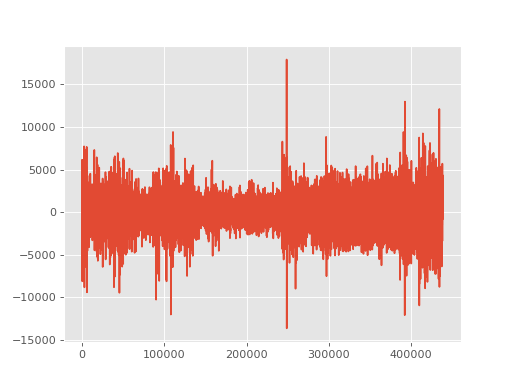

1729.4058457115477


In [43]:
sig = read_data3('2022_14_40_10-Jan-13.wav')
max_frequency= tsfelf.max_frequency(sig, 44100)

plt.figure()
plt.plot(sig)
plt.show()
print(max_frequency)

In [11]:
# Slicer to get proper values
def slicing(sig, segment_length):   # this here will slice depending on the timeframe you give it
    sig_sliced = []                 # for example 10*fs is 10 seconds, so it will slice the signal
                                    # into 10s long segments
    for i in np.arange(int(len(sig)/segment_length)):
        sig_sliced.append( sig[i*segment_length:(i+1)*segment_length] )
        
    return (sig_sliced)

In [12]:
def get_speed_and_features(data, surface, speeddf):
    columns = ["Surface"]
    features = ["RMS", "RMSf", "Spec", "Specf", "ZC", "ZCf", "Specslo", "Specslof", "Specspr", "Specsprf", "STD", "STDf"]
    a = 0
    df = pd.DataFrame(columns = columns)
    for i in range(len(data)):
        r_id = data[i]
        #Read the signals
        sig = read_data3(r_id)
        
        sli = slicing(sig, 1*44100)
        
        for sig in sli:
            df.loc[a, "ID"] = r_id
            df.loc[a, "Surface"] = surface

            s_f = hpf(sig, fs, 65, 2)
            df.loc[a, "RMS"] = tsfelf.rms(sig)
            df.loc[a, "RMS_filt"] = tsfelf.rms(s_f)

            df.loc[a, "Zero-Cross"] = tsfelf.zero_cross(sig)
            df.loc[a, "Zero-Cross_filt"] = tsfelf.zero_cross(s_f)

            df.loc[a, "Spectral_centroid"] = tsfelf.spectral_centroid(sig, fs)
            df.loc[a, "Spectral_centroid_filt"] = tsfelf.spectral_centroid(s_f, fs)

            df.loc[a, "Spectral_slope"] = tsfelf.spectral_slope(sig, fs)
            df.loc[a, "Spectral_slope_filt"] = tsfelf.spectral_slope(s_f, fs) 

            df.loc[a, "Spectral_spread"] = tsfelf.spectral_spread(sig, fs)
            df.loc[a, "Spectral_spread_filt"] = tsfelf.spectral_spread(s_f, fs) 

            df.loc[a, "STD"] = np.std(sig)

            df.loc[a, "STD_filt"] = np.std(s_f)
            
            df.loc[a, "Speed"] = speeddf['speed'][a]
            df.loc[a, "time"] = speeddf['time'][a]
            print(a, end=',')
            a = a+1
    return df, features
        

In [13]:
speeddf = df[['time', 'speed']]

speeddf = speeddf[5:400]

In [14]:
speeddf.reset_index(drop=True, inplace=True)

In [15]:
speeddf

,time,speed
0,2022/01/13 12:40:10+00,13.14
1,2022/01/13 12:40:11+00,14.15
2,2022/01/13 12:40:12+00,14.93
3,2022/01/13 12:40:13+00,15.65
4,2022/01/13 12:40:14+00,16.46
...,...,...
385,2022/01/13 12:46:48+00,27.13
386,2022/01/13 12:46:49+00,26.93
387,2022/01/13 12:46:50+00,26.45
388,2022/01/13 12:46:51+00,26.10


In [35]:
corrdf, _ = get_speed_and_features(slush_files, "Slush", speeddf)

corr2df, _ = get_speed_and_features(wet_files, "Wet", wetaspdf)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39

C:\Users\Owner\anaconda3\lib\site-packages\tsfel\feature_extraction\features.py:674: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.sum(np.array(signal) ** 2) / len(signal))


,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304

In [37]:
corr1df = corrdf

In [36]:
corr2df

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt,Speed,time
0,Wet,2022_15_00_35-Jan-13.wav,60.638200,164.016522,1093.0,1343.0,1401.567042,1494.734464,-1.077075e-08,-1.066648e-08,2536.906875,2322.294890,222.028659,164.016486,3.82,2022/01/13 13:00:35+00
1,Wet,2022_15_00_35-Jan-13.wav,68.008585,124.984829,1539.0,1978.0,1675.554111,1884.204651,-1.046410e-08,-1.023058e-08,2408.223063,2446.096590,170.193439,124.984735,4.86,2022/01/13 13:00:36+00
2,Wet,2022_15_00_35-Jan-13.wav,54.429456,192.735358,784.0,1090.0,1129.570864,1346.162269,-1.107518e-08,-1.083276e-08,2070.496484,2192.641160,271.920210,192.735317,5.77,2022/01/13 13:00:37+00
3,Wet,2022_15_00_35-Jan-13.wav,52.506278,278.360108,539.0,679.0,833.686353,907.438990,-1.140634e-08,-1.132379e-08,2170.504456,2071.326462,356.505473,278.360062,7.94,2022/01/13 13:00:38+00
4,Wet,2022_15_00_35-Jan-13.wav,59.446064,156.119139,788.0,1100.0,1105.372056,1286.702283,-1.110226e-08,-1.089931e-08,2158.922188,2227.659546,224.813894,156.119138,8.71,2022/01/13 13:00:39+00
5,Wet,2022_15_00_35-Jan-13.wav,67.932423,158.726560,935.0,1123.0,2499.734907,2687.961961,-9.541661e-09,-9.330993e-09,2531.600214,2521.147202,196.423074,158.726551,9.73,2022/01/13 13:00:40+00
6,Wet,2022_15_00_35-Jan-13.wav,48.255676,299.146369,448.0,563.0,863.581405,890.438687,-1.137288e-08,-1.134282e-08,2324.019753,2043.145804,404.056932,299.146345,10.66,2022/01/13 13:00:41+00
7,Wet,2022_15_00_35-Jan-13.wav,57.239754,227.965511,1021.0,1282.0,1167.480225,1323.515532,-1.103275e-08,-1.085811e-08,2140.862398,2187.918592,287.435603,227.965426,10.84,2022/01/13 13:00:42+00
8,Wet,2022_15_00_35-Jan-13.wav,59.422483,188.048646,1069.0,1266.0,1449.293821,1371.684073,-1.071734e-08,-1.080420e-08,2710.647022,2170.421639,232.854625,188.048630,10.29,2022/01/13 13:00:43+00
9,Wet,2022_15_00_45-Jan-13.wav,56.065747,226.660758,948.0,942.0,915.539677,978.449383,-1.131473e-08,-1.124432e-08,1855.601639,1906.198721,240.435167,226.660681,9.69,2022/01/13 13:00:44+00


In [38]:
corrdf = pd.concat([corr1df, corr1df])

corrdf

,Surface,ID,RMS,RMS_filt,Zero-Cross,Zero-Cross_filt,Spectral_centroid,Spectral_centroid_filt,Spectral_slope,Spectral_slope_filt,Spectral_spread,Spectral_spread_filt,STD,STD_filt,Speed,time
0,Slush,2022_14_40_10-Jan-13.wav,17.461582,1803.843155,570.0,664.0,717.869323,615.931542,-1.153596e-08,-1.165005e-08,1872.224357,1125.985445,2158.770819,1803.839883,13.14,2022/01/13 12:40:10+00
1,Slush,2022_14_40_10-Jan-13.wav,20.228209,1353.165966,643.0,753.0,575.062956,645.676702,-1.169579e-08,-1.161676e-08,1039.920840,1114.700868,1577.934108,1353.165933,14.15,2022/01/13 12:40:11+00
2,Slush,2022_14_40_10-Jan-13.wav,19.220683,1798.103466,451.0,537.0,510.008544,533.094001,-1.176861e-08,-1.174277e-08,1347.417645,1158.555343,2134.105522,1798.103439,14.93,2022/01/13 12:40:12+00
3,Slush,2022_14_40_10-Jan-13.wav,25.172023,986.070222,493.0,601.0,635.503186,639.770864,-1.162815e-08,-1.162337e-08,1854.366867,1536.445548,1354.236310,986.067366,15.65,2022/01/13 12:40:13+00
4,Slush,2022_14_40_10-Jan-13.wav,32.146250,857.706253,543.0,601.0,826.600897,638.742998,-1.141427e-08,-1.162452e-08,2273.307409,1357.842593,1066.764229,857.706185,16.46,2022/01/13 12:40:14+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,Slush,2022_14_46_47-Jan-13.wav,NaN,9585.864878,504.0,603.0,448.950218,577.389336,-1.183694e-08,-1.169319e-08,836.769729,1308.788069,11459.300787,9585.862349,27.54,2022/01/13 12:46:18+00
356,Slush,2022_14_46_47-Jan-13.wav,11.080723,8591.031765,543.0,639.0,723.575442,630.678083,-1.152958e-08,-1.163355e-08,2011.375363,1418.191491,10680.891080,8591.017940,27.66,2022/01/13 12:46:19+00
357,Slush,2022_14_46_47-Jan-13.wav,NaN,8916.587063,578.0,688.0,895.195442,541.987722,-1.133750e-08,-1.173281e-08,2471.672377,901.364851,10753.378040,8916.586542,27.99,2022/01/13 12:46:20+00
358,Slush,2022_14_46_47-Jan-13.wav,NaN,8904.415515,544.0,681.0,805.951153,539.917858,-1.143738e-08,-1.173513e-08,2255.556428,878.260412,11064.123815,8904.414912,27.97,2022/01/13 12:46:21+00


In [39]:
import seaborn as sns
%matplotlib notebook
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


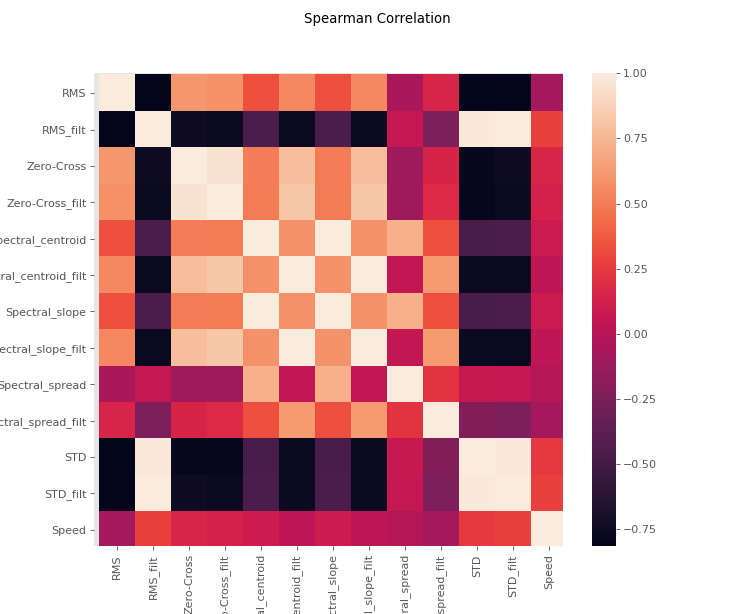

In [40]:
plt.figure()

plt.suptitle("Spearman Correlation")

sns.heatmap(corrdf.corr(method='spearman'))

plt.show()

<IPython.core.display.Javascript object>


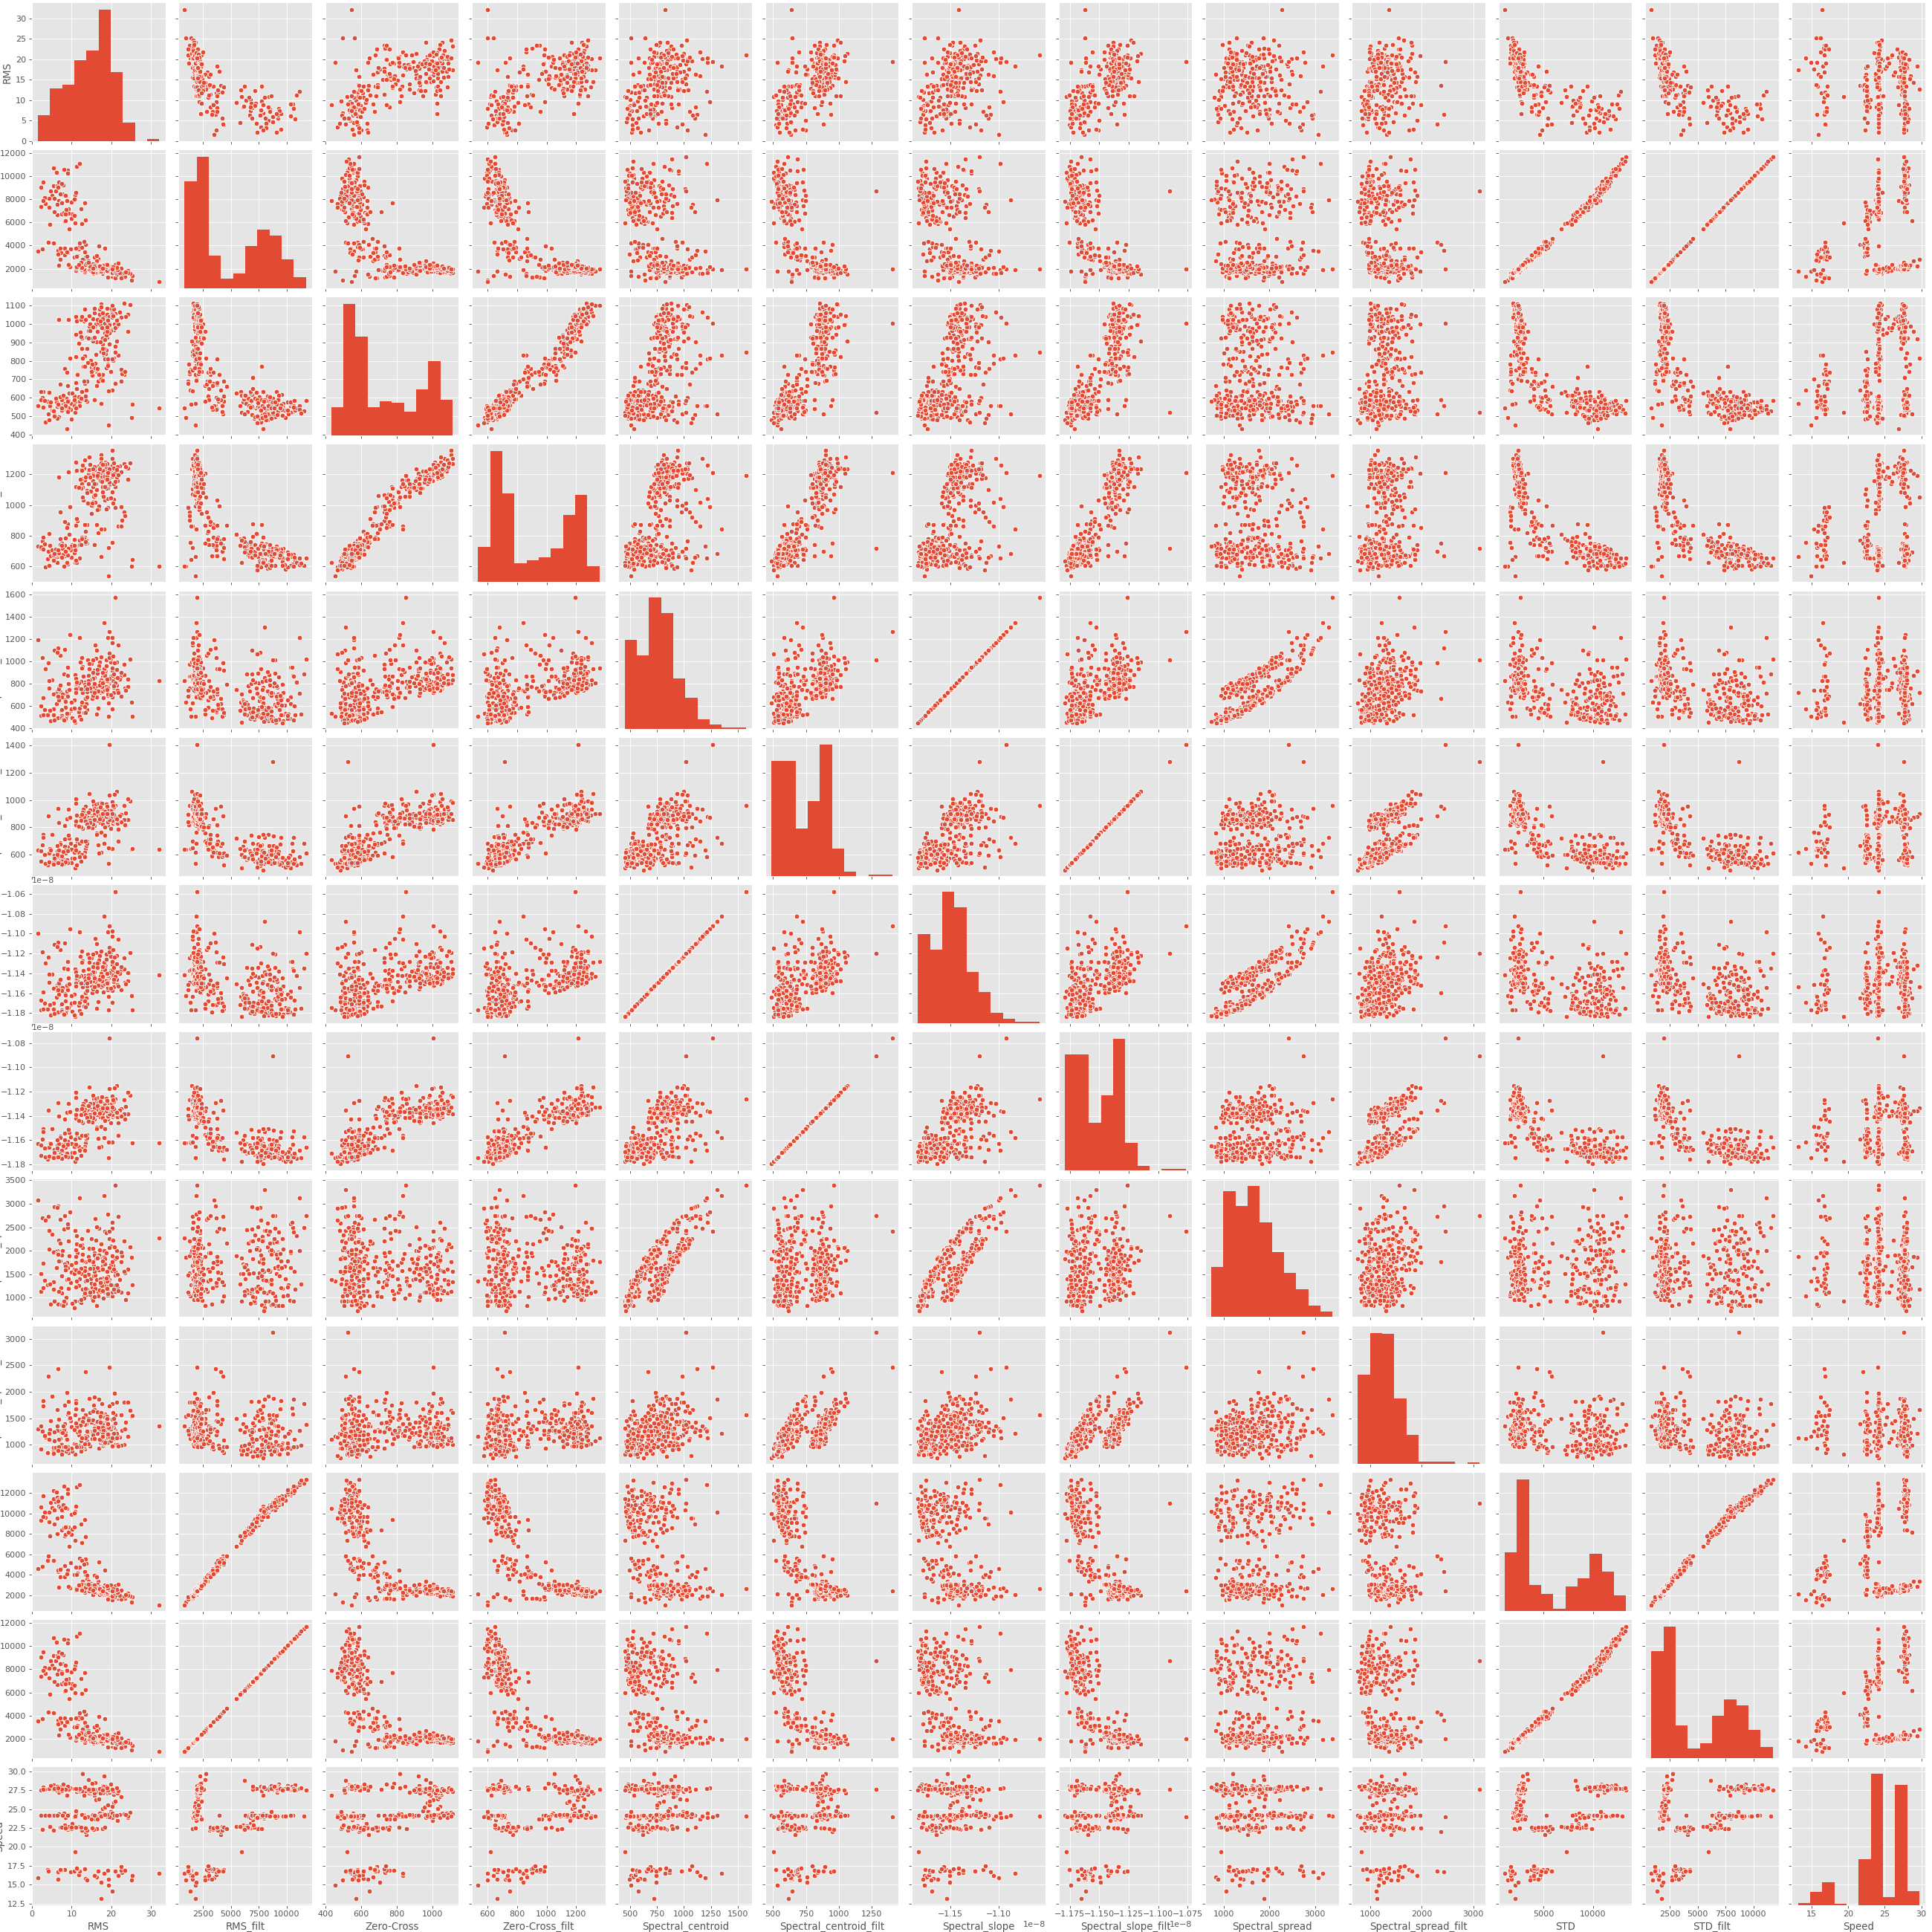

In [41]:
sns.pairplot(corrdf)